In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("24-medical_cost.csv")

In [4]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [6]:
df.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


In [7]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='charges'>

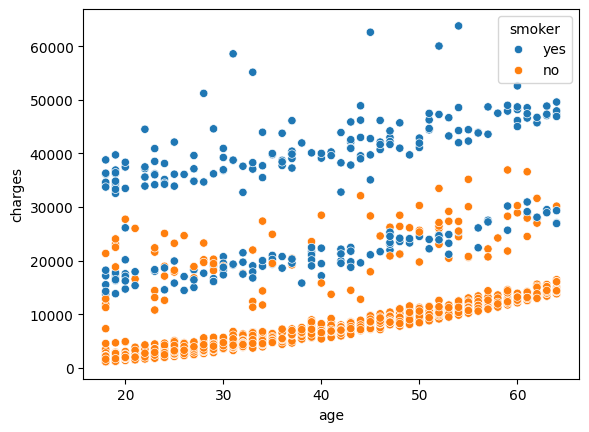

In [9]:
sns.scatterplot(df, x="age",y="charges", hue="smoker")

<Axes: xlabel='bmi', ylabel='charges'>

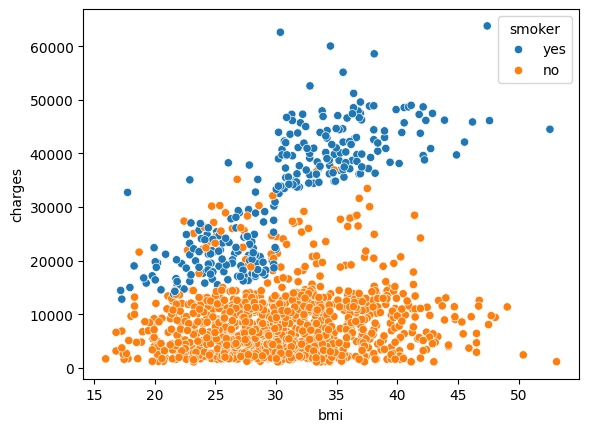

In [11]:
sns.scatterplot(df, x="bmi",y="charges", hue="smoker")

In [13]:
df.drop("Id", axis=1, inplace=True)

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})

In [16]:
X = df.drop("charges", axis=1)
y = df["charges"]
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), ["region"])
    ],
    remainder="passthrough"
)

In [25]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [28]:
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())

In [29]:
X_train

,cat__region_northwest,cat__region_southeast,cat__region_southwest,remainder__age,remainder__sex,remainder__bmi,remainder__children,remainder__smoker
0,0.0,1.0,0.0,56.0,0.0,31.790,2.0,1.0
1,0.0,0.0,1.0,31.0,1.0,29.100,0.0,0.0
2,0.0,0.0,0.0,50.0,1.0,27.360,0.0,0.0
3,0.0,1.0,0.0,48.0,0.0,29.700,0.0,0.0
4,0.0,0.0,1.0,19.0,1.0,20.600,0.0,0.0
...,...,...,...,...,...,...,...,...
998,0.0,1.0,0.0,20.0,1.0,24.420,0.0,1.0
999,1.0,0.0,0.0,40.0,1.0,32.775,2.0,1.0
1000,0.0,1.0,0.0,48.0,0.0,24.420,0.0,1.0
1001,0.0,0.0,0.0,44.0,0.0,22.135,2.0,0.0


In [30]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 8
[LightGBM] [Info] Start training from score 13374.181390


/home/arda/notebook_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
print(f"r2: {r2_score(y_test, y_pred)}")
print(f"rmse: {mean_squared_error(y_test, y_pred)**0.5}")

r2: 0.871843376594573
rmse: 4296.287422164391


In [37]:
param_grid = {
    "num_leaves" : [31, 50, 70],
    "max_depth" : [-1, 5, 10],
    "learning_rate" : [0.01, 0.05, 0.1],
    "n_estimators" : [100, 300, 1000],
    "min_child_samples" : [10,20,30],
    "subsample" : [0.6, 0.8, 1.0],
    "colsample_bytree" : [0.6, 0.8, 1.0],
    "reg_alpha" : [0, 0.5, 1.0],
    "reg_lambda" : [0, 0.5, 1.0]
}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [39]:
random_search = RandomizedSearchCV(
    estimator=LGBMRegressor(verbosity=-1),
    param_distributions=param_grid,
    cv=5,
    verbose=0,
    random_state=15,
    n_jobs=-1,
    scoring="neg_root_mean_squared_error"
)

In [40]:
random_search.fit(X_train, y_train)

3613.21s - Error patching args (debugger not attached to subprocess).
Traceback (most recent call last):
  File "/home/arda/notebook_env/lib/python3.12/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 541, in patch_args
    new_args.append(_get_python_c_args(host, port, code, unquoted_args, SetupHolder.setup))
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/arda/notebook_env/lib/python3.12/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 193, in _get_python_c_args
    if "__future__" in code:
       ^^^^^^^^^^^^^^^^^^^^
TypeError: a bytes-like object is required, not 'str'
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.0

,estimator,LGBMRegressor(verbosity=-1)
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [-1, 5, ...], 'min_child_samples': [10, 20, ...], ...}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,15
,error_score,nan


In [41]:
random_search.best_params_

{'subsample': 0.6,
 'reg_lambda': 1.0,
 'reg_alpha': 0.5,
 'num_leaves': 50,
 'n_estimators': 100,
 'min_child_samples': 30,
 'max_depth': -1,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [43]:
y_pred = random_search.predict(X_test)
print(f"r2: {r2_score(y_test, y_pred)}")
print(f"rmse: {mean_squared_error(y_test, y_pred)**0.5}")

r2: 0.8858097014961821
rmse: 4055.434617002697


In [44]:
from scipy.stats import boxcox

In [47]:
y_train_transformed, lambda_y = boxcox(y_train)
model = LGBMRegressor()
model.fit(X_train, y_train_transformed)
y_pred = model.predict(X_test)

In [49]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

In [51]:
y_pred = inverse_boxcox(y_pred, lambda_y)

In [52]:
print(f"r2: {r2_score(y_test, y_pred)}")
print(f"rmse: {mean_squared_error(y_test, y_pred)**0.5}")

r2: 0.8925898035961266
rmse: 3933.195695471598
